Image Dimension Statistics:
Minimum Dimensions: [512 512   1]
Maximum Dimensions: [512 512   1]
Mean Dimensions: [512. 512.   1.]
Standard Deviation of Dimensions: [0. 0. 0.]

Band Mean Statistics:
Minimum Band Means: [0.78609085]
Maximum Band Means: [0.89573669]
Mean Band Means: [0.82806015]
Standard Deviation of Band Means: [0.04100778]


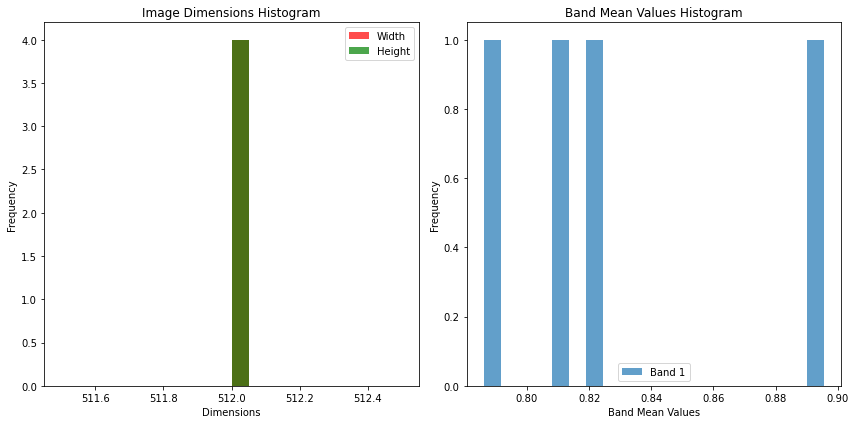

In [1]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the directory containing the TIFF image files
image_directory = 'D:/Satsure/Data/train_labels/'

# Get a list of all TIFF files in the directory
tif_files = [f for f in os.listdir(image_directory) if f.endswith('.tif')]

# Initialize lists to store image dimensions and some statistics
image_dimensions = []
image_means = []

# Loop through all TIFF files
for tif_file in tif_files:
    tif_file_path = os.path.join(image_directory, tif_file)
    
    # Open the TIFF file
    with rasterio.open(tif_file_path) as dataset:
        # Get image dimensions (width, height, and number of bands)
        width = dataset.width
        height = dataset.height
        num_bands = dataset.count
        
        # Read the image data as a NumPy array
        image_data = dataset.read()
        
        # Calculate the mean pixel value for each band
        band_means = [np.mean(image_data[i]) for i in range(num_bands)]
        
        # Append image dimensions and band means to the respective lists
        image_dimensions.append((width, height, num_bands))
        image_means.append(band_means)

# Convert lists to NumPy arrays for easier analysis
image_dimensions = np.array(image_dimensions)
image_means = np.array(image_means)

# Calculate summary statistics for image dimensions and band means
min_dimensions = np.min(image_dimensions, axis=0)
max_dimensions = np.max(image_dimensions, axis=0)
mean_dimensions = np.mean(image_dimensions, axis=0)
std_dimensions = np.std(image_dimensions, axis=0)

min_band_means = np.min(image_means, axis=0)
max_band_means = np.max(image_means, axis=0)
mean_band_means = np.mean(image_means, axis=0)
std_band_means = np.std(image_means, axis=0)

# Print and visualize the summary statistics
print("Image Dimension Statistics:")
print(f"Minimum Dimensions: {min_dimensions}")
print(f"Maximum Dimensions: {max_dimensions}")
print(f"Mean Dimensions: {mean_dimensions}")
print(f"Standard Deviation of Dimensions: {std_dimensions}")

print("\nBand Mean Statistics:")
print(f"Minimum Band Means: {min_band_means}")
print(f"Maximum Band Means: {max_band_means}")
print(f"Mean Band Means: {mean_band_means}")
print(f"Standard Deviation of Band Means: {std_band_means}")

# Visualize the image dimensions
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(image_dimensions[:, 0], bins=20, color='r', alpha=0.7, label='Width')
plt.hist(image_dimensions[:, 1], bins=20, color='g', alpha=0.7, label='Height')
plt.xlabel('Dimensions')
plt.ylabel('Frequency')
plt.legend()
plt.title('Image Dimensions Histogram')

# Visualize the band mean statistics
plt.subplot(122)
for i in range(num_bands):
    plt.hist(image_means[:, i], bins=20, alpha=0.7, label=f'Band {i + 1}')
plt.xlabel('Band Mean Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Band Mean Values Histogram')

plt.tight_layout()
plt.show()


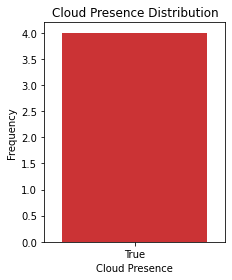

No missing TIFF files found.


In [5]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the directory containing the TIFF image files
image_directory = 'D:/Satsure/Data/train_labels/'

# Get a list of all TIFF files in the directory
tif_files = [f for f in os.listdir(image_directory) if f.endswith('.tif')]

# Limit the number of images to 100
tif_files = tif_files[:2500]

# Function to process a single TIFF file
def process_tif(tif_file):
    tif_file_path = os.path.join(image_directory, tif_file)
    
    # Open the TIFF file
    with rasterio.open(tif_file_path) as dataset:
        # Read the image data as a NumPy array
        image_data = dataset.read()
        
        # Calculate cloud intensity (you can define your own logic for this)
        cloud_intensity_value = np.mean(image_data[0])  # Adjust band index as needed
        
        # Check for cloud presence (you can define your own threshold)
        cloud_present = cloud_intensity_value > 0.1  # Adjust threshold as needed
        
        return cloud_intensity_value, cloud_present

# Process the selected 100 TIFF files
results = [process_tif(tif_file) for tif_file in tif_files]

# Extract cloud intensity and cloud presence from the results
cloud_intensity, cloud_presence = zip(*results)

# Convert lists to NumPy arrays for easier analysis
cloud_intensity = np.array(cloud_intensity)
cloud_presence = np.array(cloud_presence)

# Visualize cloud presence distribution
plt.subplot(122)
sns.countplot(x=cloud_presence, palette='Set1')
plt.xlabel('Cloud Presence')
plt.ylabel('Frequency')
plt.title('Cloud Presence Distribution')

plt.tight_layout()
plt.show()

# Identify missing data or anomalies (e.g., missing TIFF files)
missing_files = set(tif_files) - set(os.listdir(image_directory))
if missing_files:
    print("Missing TIFF Files:")
    for missing_file in missing_files:
        print(missing_file)
else:
    print("No missing TIFF files found.")

In [5]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

model_name = "google/vit-base-patch16-224-in21k"
feature_extractor = ViTFeatureExtractor(model_name)
model = ViTForImageClassification.from_pretrained(model_name)


Downloading: 100%|██████████| 502/502 [00:00<00:00, 503kB/s]
Downloading: 100%|██████████| 330M/330M [00:54<00:00, 6.34MB/s] 
Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probab

In [6]:
import torch.nn as nn
import torch.optim as optim

# Modify the model architecture for binary classification
model.classifier = nn.Sequential(
    nn.Linear(768, 2),  # Output 2 classes (cloud, no cloud)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [10]:
num_epochs = 10  # Set the number of training epochs

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)




ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea

In [9]:
class CustomDataset(Dataset):
    def __init__(self, data_dir, label_dir, transform=None):
        self.data_dir = data_dir
        self.label_dir = label_dir
        self.transform = transform

        self.image_files = os.listdir(data_dir)
        self.label_files = os.listdir(label_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.image_files[idx])
        label_name = os.path.join(self.label_dir, self.label_files[idx])

        image = cv2.imread(img_name)
        label = cv2.imread(label_name, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            image = self.transform(image)
            if image is None:
                print(f"Error loading image: {img_name}")
                return None, None

        return image, label


Exploring D:\Satsure\Data\train_features\wghi\B02.tif


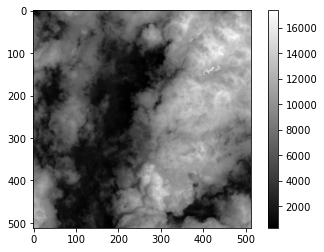

Exploring D:\Satsure\Data\train_features\wghi\B03.tif


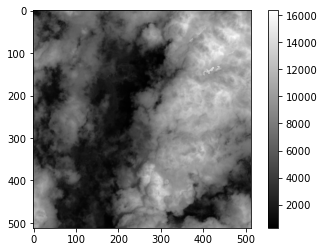

Exploring D:\Satsure\Data\train_features\wghi\B04.tif


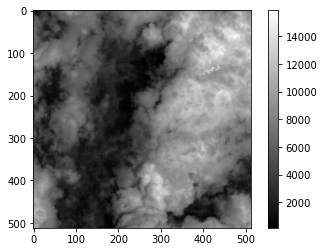

Exploring D:\Satsure\Data\train_features\wghi\B08.tif


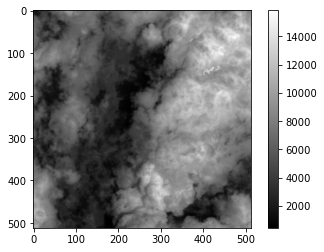

Exploring D:\Satsure\Data\train_labels\wghi.tif


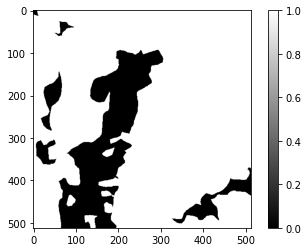

In [15]:
import os
import matplotlib.pyplot as plt
import rasterio

# Define the paths to the dataset folders
data_folder = r"D:\Satsure\Data"
features_folder = os.path.join(data_folder, "train_features")
labels_folder = os.path.join(data_folder, "train_labels")

# List the subfolders in the features folder
subfolders = os.listdir(features_folder)

# Function to load and visualize an image
def load_and_visualize_image(image_path):
    with rasterio.open(image_path) as src:
        img = src.read(1)  # Read the first band (change the band index as needed)
        plt.imshow(img, cmap='gray')
        plt.colorbar()
        plt.show()

# Loop through each subfolder and explore the data
for subfolder in subfolders:
    subfolder_path = os.path.join(features_folder, subfolder)
    
    # List the multispectral band images
    band_images = [os.path.join(subfolder_path, f"B02.tif"),
                   os.path.join(subfolder_path, f"B03.tif"),
                   os.path.join(subfolder_path, f"B04.tif"),
                   os.path.join(subfolder_path, f"B08.tif")]
    
    # Load and visualize each band image
    for band_image in band_images:
        print(f"Exploring {band_image}")
        load_and_visualize_image(band_image)
    
    # Load and visualize the corresponding label image
    label_image = os.path.join(labels_folder, f"{subfolder}.tif")
    print(f"Exploring {label_image}")
    load_and_visualize_image(label_image)
    break


Exploring D:\Satsure\Data\train_features\wghi\B02.tif


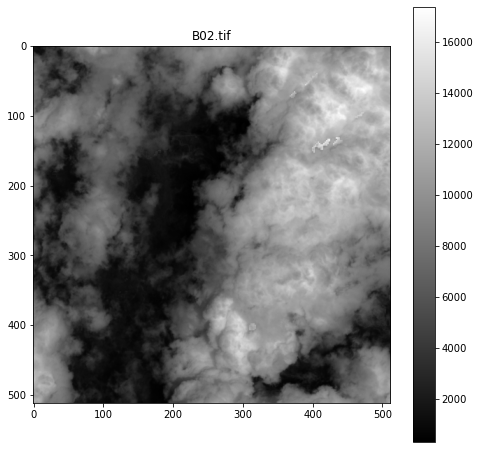

Exploring D:\Satsure\Data\train_features\wghi\B03.tif


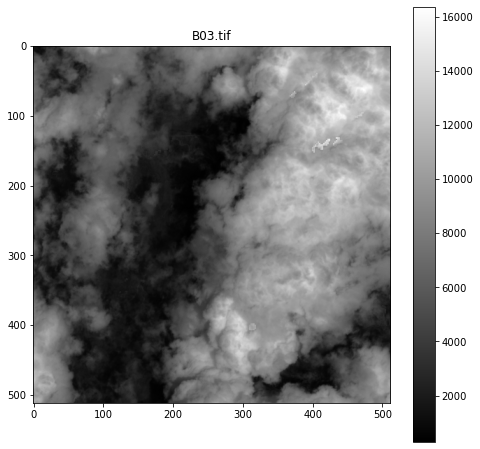

Exploring D:\Satsure\Data\train_features\wghi\B04.tif


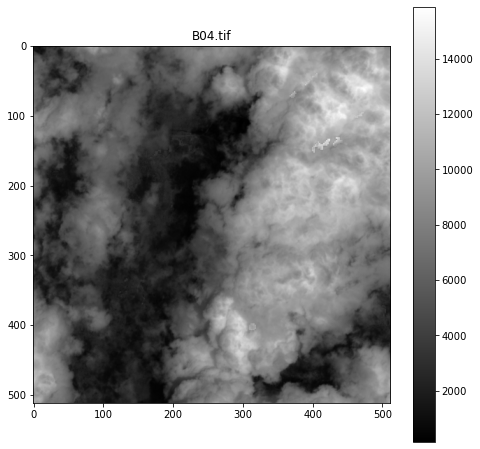

Exploring D:\Satsure\Data\train_features\wghi\B08.tif


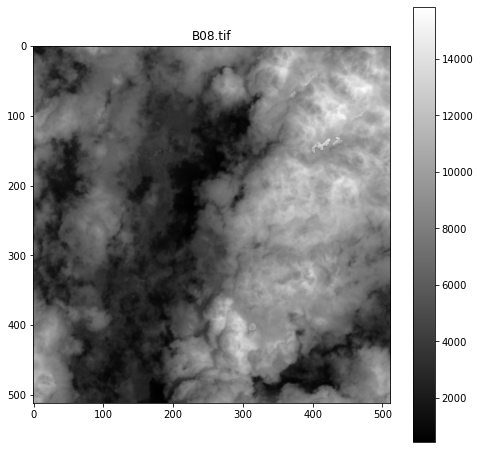

Exploring D:\Satsure\Data\train_labels\wghi.tif


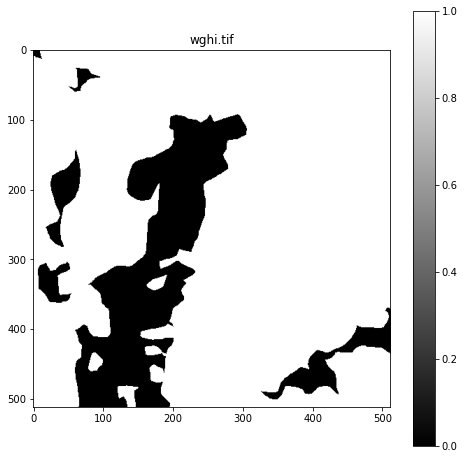

Cloud Coverage Percentage: 81.00%
Number of Cloud Pixels: 212332
Number of Non-Cloud Pixels: 49812
Exploring D:\Satsure\Data\train_features\wghx\B02.tif


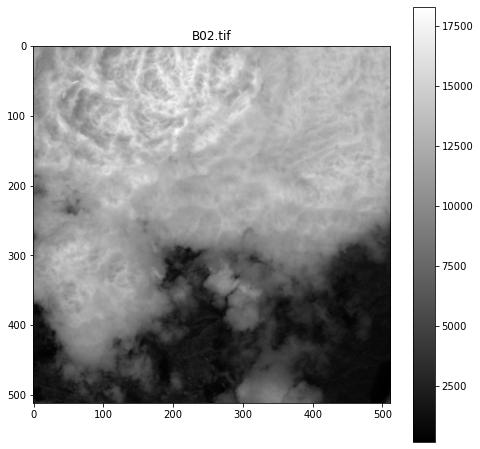

Exploring D:\Satsure\Data\train_features\wghx\B03.tif


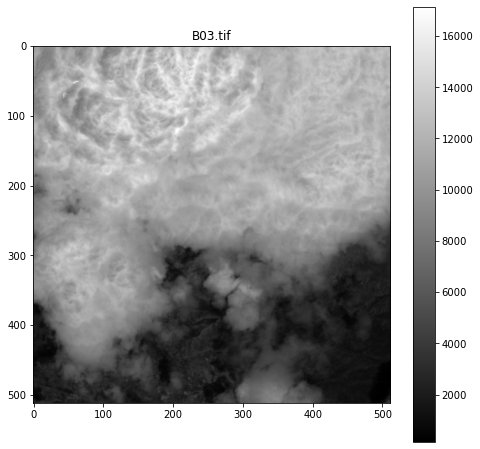

Exploring D:\Satsure\Data\train_features\wghx\B04.tif


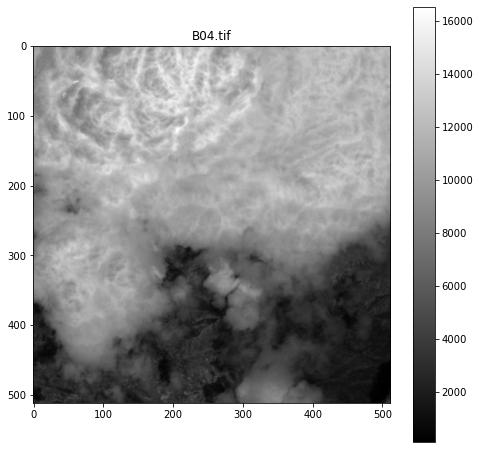

Exploring D:\Satsure\Data\train_features\wghx\B08.tif


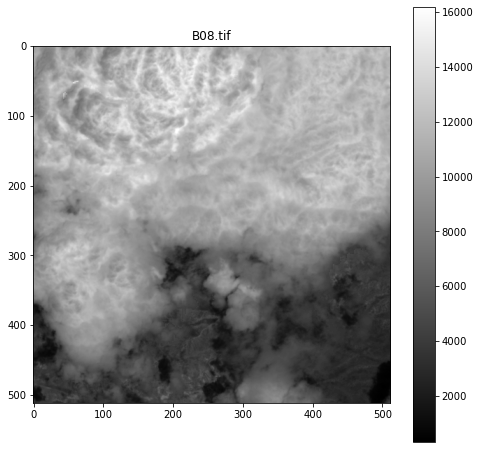

Exploring D:\Satsure\Data\train_labels\wghx.tif


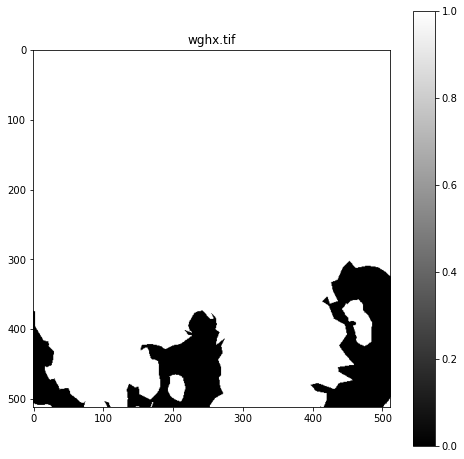

Cloud Coverage Percentage: 89.57%
Number of Cloud Pixels: 234812
Number of Non-Cloud Pixels: 27332
Exploring D:\Satsure\Data\train_features\wghy\B02.tif


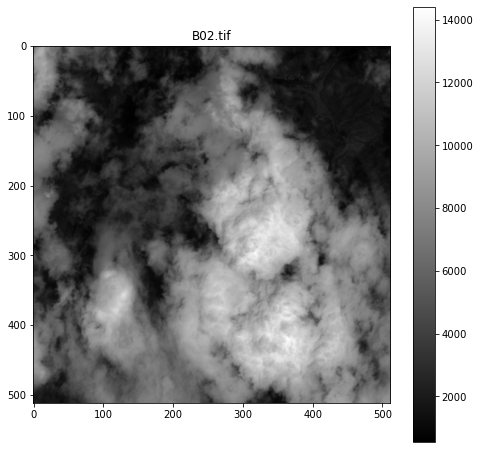

Exploring D:\Satsure\Data\train_features\wghy\B03.tif


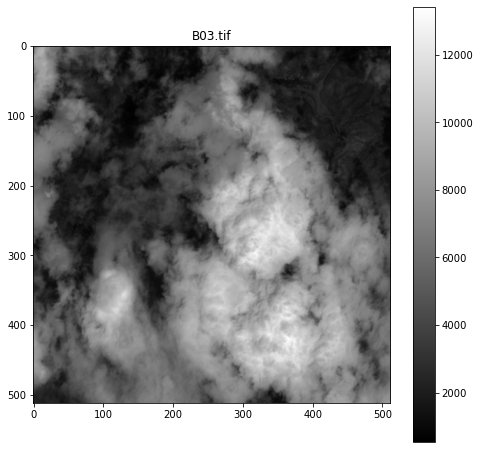

Exploring D:\Satsure\Data\train_features\wghy\B04.tif


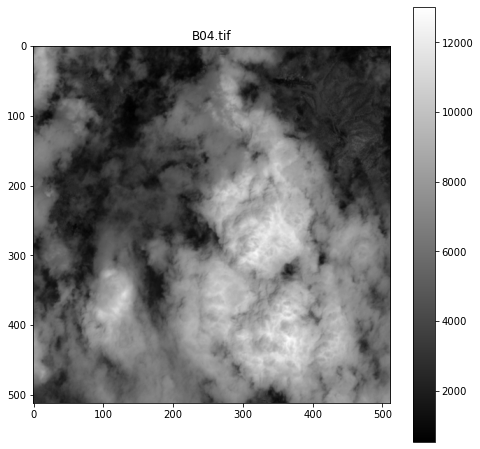

Exploring D:\Satsure\Data\train_features\wghy\B08.tif


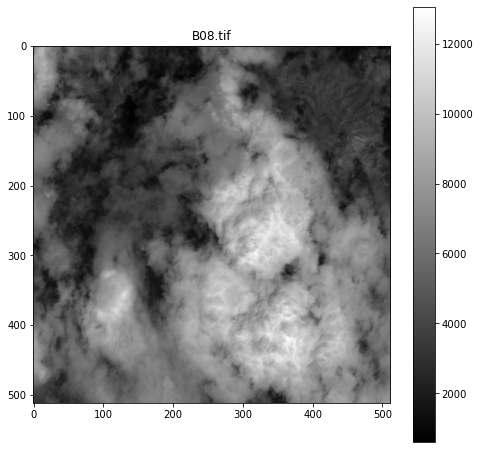

Exploring D:\Satsure\Data\train_labels\wghy.tif


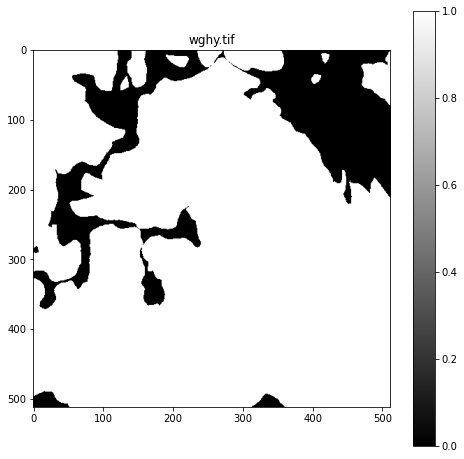

Cloud Coverage Percentage: 82.04%
Number of Cloud Pixels: 215071
Number of Non-Cloud Pixels: 47073
Exploring D:\Satsure\Data\train_features\wgif\B02.tif


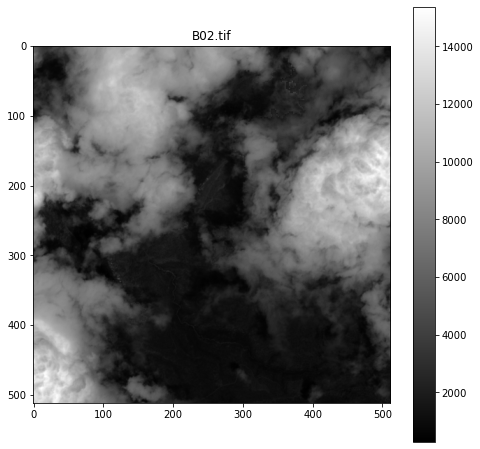

Exploring D:\Satsure\Data\train_features\wgif\B03.tif


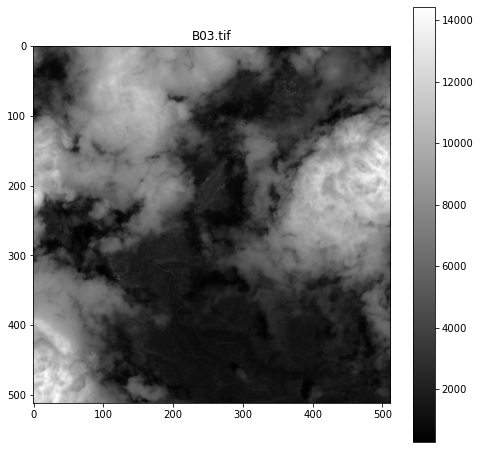

Exploring D:\Satsure\Data\train_features\wgif\B04.tif


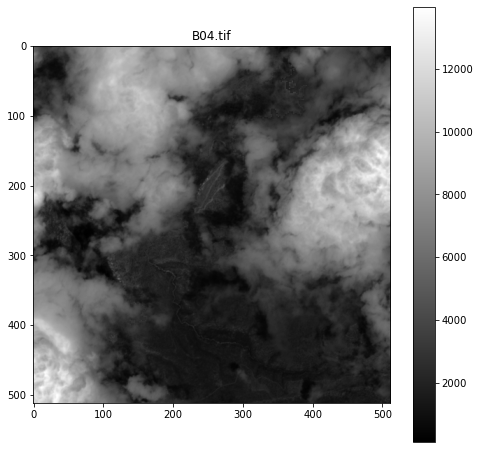

Exploring D:\Satsure\Data\train_features\wgif\B08.tif


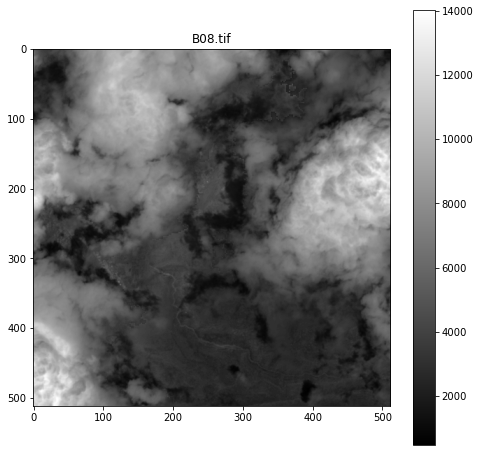

Exploring D:\Satsure\Data\train_labels\wgif.tif


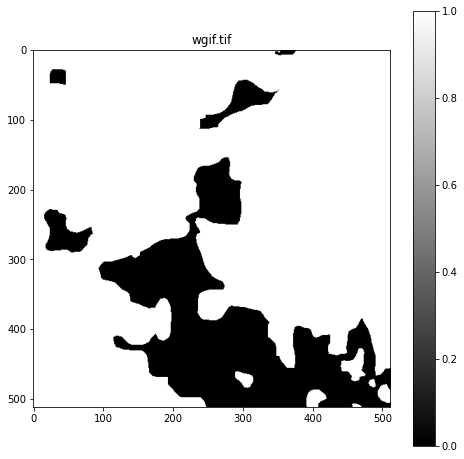

Cloud Coverage Percentage: 78.61%
Number of Cloud Pixels: 206069
Number of Non-Cloud Pixels: 56075


In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# Define the paths to the dataset folders
data_folder = r"D:\Satsure\Data"
features_folder = os.path.join(data_folder, "train_features")
labels_folder = os.path.join(data_folder, "train_labels")

# List the subfolders in the features folder
subfolders = os.listdir(features_folder)

# Function to load and visualize an image
def load_and_visualize_image(image_path, title):
    with rasterio.open(image_path) as src:
        img = src.read(1)  # Read the first band (change the band index as needed)

        # Get image dimensions
        height, width = img.shape

        # Plot the image
        plt.figure(figsize=(8, 8))
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.colorbar()
        plt.show()

        return height, width

# Function to compute statistics about the label image
def analyze_label_image(label_path, height, width):
    with rasterio.open(label_path) as src:
        img = src.read(1)

        # Compute cloud distribution statistics
        cloud_pixels = np.sum(img == 1)
        non_cloud_pixels = np.sum(img == 0)
        total_pixels = height * width
        cloud_coverage_percentage = (cloud_pixels / total_pixels) * 100

        print(f"Cloud Coverage Percentage: {cloud_coverage_percentage:.2f}%")
        print(f"Number of Cloud Pixels: {cloud_pixels}")
        print(f"Number of Non-Cloud Pixels: {non_cloud_pixels}")

# Loop through each subfolder and explore the data
for subfolder in subfolders:
    subfolder_path = os.path.join(features_folder, subfolder)
    
    # List the multispectral band images
    band_images = [os.path.join(subfolder_path, f"B02.tif"),
                   os.path.join(subfolder_path, f"B03.tif"),
                   os.path.join(subfolder_path, f"B04.tif"),
                   os.path.join(subfolder_path, f"B08.tif")]
    
    # Initialize height and width
    height, width = None, None

    # Load and visualize each band image
    for band_image in band_images:
        print(f"Exploring {band_image}")
        height, width = load_and_visualize_image(band_image, title=os.path.basename(band_image))
    
    if height is not None and width is not None:
        # Load and visualize the corresponding label image
        label_image = os.path.join(labels_folder, f"{subfolder}.tif")
        print(f"Exploring {label_image}")
        load_and_visualize_image(label_image, title=os.path.basename(label_image))
        
        # Analyze the label image to get cloud coverage statistics
        analyze_label_image(label_image, height, width)


In [27]:
import os
import rasterio

# Define the paths to the dataset folders
data_folder = r"D:\Satsure\Data"
features_folder = os.path.join(data_folder, "train_features")
labels_folder = os.path.join(data_folder, "train_labels")

# List the subfolders in the features folder
subfolders = os.listdir(features_folder)

# Function to get image characteristics
def get_image_info(image_path):
    with rasterio.open(image_path) as src:
        height, width = src.shape
        num_bands = src.count
        data_type = src.dtypes[0]
        crs = src.crs
        nodata_value = src.nodata
        min_val = src.read(1).min()
        max_val = src.read(1).max()

    return {
        "Height": height,
        "Width": width,
        "Num Bands": num_bands,
        "Data Type": data_type,
        "CRS": crs,
        "Nodata Value": nodata_value,
        "Min Value": min_val,
        "Max Value": max_val,
    }

# Loop through each subfolder and explore the data
for subfolder in subfolders:
    subfolder_path = os.path.join(features_folder, subfolder)
    
    # List the multispectral band images
    band_images = [os.path.join(subfolder_path, f"B02.tif"),
                   os.path.join(subfolder_path, f"B03.tif"),
                   os.path.join(subfolder_path, f"B04.tif"),
                   os.path.join(subfolder_path, f"B08.tif")]
    
    # Print information about each band image
    for band_image in band_images:
        print(f"Image: {band_image}")
        image_info = get_image_info(band_image)
        for key, value in image_info.items():
            print(f"{key}: {value}")
        print("\n")

    # Print information about the label image
    label_image = os.path.join(labels_folder, f"{subfolder}.tif")
    print(f"Label Image: {label_image}")
    label_info = get_image_info(label_image)
    for key, value in label_info.items():
        print(f"{key}: {value}")
    print("\n")


Image: D:\Satsure\Data\train_features\wghi\B02.tif
Height: 512
Width: 512
Num Bands: 1
Data Type: uint16
CRS: EPSG:32629
Nodata Value: 0.0
Min Value: 311
Max Value: 17360


Image: D:\Satsure\Data\train_features\wghi\B03.tif
Height: 512
Width: 512
Num Bands: 1
Data Type: uint16
CRS: EPSG:32629
Nodata Value: 0.0
Min Value: 289
Max Value: 16360


Image: D:\Satsure\Data\train_features\wghi\B04.tif
Height: 512
Width: 512
Num Bands: 1
Data Type: uint16
CRS: EPSG:32629
Nodata Value: 0.0
Min Value: 159
Max Value: 15872


Image: D:\Satsure\Data\train_features\wghi\B08.tif
Height: 512
Width: 512
Num Bands: 1
Data Type: uint16
CRS: EPSG:32629
Nodata Value: 0.0
Min Value: 445
Max Value: 15832


Label Image: D:\Satsure\Data\train_labels\wghi.tif
Height: 512
Width: 512
Num Bands: 1
Data Type: uint8
CRS: EPSG:32629
Nodata Value: 255.0
Min Value: 0
Max Value: 1


Image: D:\Satsure\Data\train_features\wghx\B02.tif
Height: 512
Width: 512
Num Bands: 1
Data Type: uint16
CRS: EPSG:32629
Nodata Value: 0.0
M

In [39]:
import os
import torch
from torchvision import transforms
from torchvision.io import read_image
from skimage.util import view_as_windows
import cv2

# Define the paths to the dataset folders
data_folder = r"D:\Satsure\Data"
features_folder = os.path.join(data_folder, "train_features")
labels_folder = os.path.join(data_folder, "train_labels")

# Define the output folder for preprocessed images
output_folder = os.path.join(data_folder, "preprocessed_features_vit")

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List the subfolders in the features folder
subfolders = os.listdir(features_folder)

# Function to preprocess an image using GDAL and create patches
def preprocess_image(input_image_path, output_folder, patch_size=(64, 64), stride=32):
    try:
        # Open the input image with GDAL
        input_dataset = gdal.Open(input_image_path, gdal.GA_ReadOnly)
        if input_dataset is None:
            return "Error: Unable to open input image"
        
        # Read the image as a NumPy array
        img = input_dataset.ReadAsArray()

        # Create image patches
        patches = view_as_windows(img, patch_size, step=stride)

        # Save the patches as separate images
        for i in range(patches.shape[0]):
            for j in range(patches.shape[1]):
                patch = patches[i, j]
                patch_output_path = os.path.join(output_folder, f"patch_{i}_{j}.png")
                cv2.imwrite(patch_output_path, patch)

        return None  # No issues found
    
    except Exception as e:
        return f"Error: {e}"

# Loop through each subfolder and preprocess data
for subfolder in subfolders:
    subfolder_path = os.path.join(features_folder, subfolder)
    
    # List the multispectral band images
    band_images = [os.path.join(subfolder_path, f"B02.tif"),
                   os.path.join(subfolder_path, f"B03.tif"),
                   os.path.join(subfolder_path, f"B04.tif"),
                   os.path.join(subfolder_path, f"B08.tif")]
    
    # Create a subfolder in the output directory
    subfolder_output_path = os.path.join(output_folder, subfolder)
    os.makedirs(subfolder_output_path, exist_ok=True)
    
    # Preprocess and save each band image as patches
    for band_image in band_images:
        result = preprocess_image(band_image, subfolder_output_path)
        if result:
            print(f"Anomaly detected in {band_image}: {result}")
        else:
            print(f"Preprocessed {band_image} into patches and saved to {subfolder_output_path}")

    # Dynamically construct the label path based on the subfolder name
    label_filename = f"{subfolder}.tif"
    label_path = os.path.join(labels_folder, label_filename)

    # Now, you can use the 'label_path' for further processing or associating labels with patches


Preprocessed D:\Satsure\Data\train_features\wghi\B02.tif into patches and saved to D:\Satsure\Data\preprocessed_features_vit\wghi
Preprocessed D:\Satsure\Data\train_features\wghi\B03.tif into patches and saved to D:\Satsure\Data\preprocessed_features_vit\wghi
Preprocessed D:\Satsure\Data\train_features\wghi\B04.tif into patches and saved to D:\Satsure\Data\preprocessed_features_vit\wghi
Preprocessed D:\Satsure\Data\train_features\wghi\B08.tif into patches and saved to D:\Satsure\Data\preprocessed_features_vit\wghi
Preprocessed D:\Satsure\Data\train_features\wghx\B02.tif into patches and saved to D:\Satsure\Data\preprocessed_features_vit\wghx
Preprocessed D:\Satsure\Data\train_features\wghx\B03.tif into patches and saved to D:\Satsure\Data\preprocessed_features_vit\wghx
Preprocessed D:\Satsure\Data\train_features\wghx\B04.tif into patches and saved to D:\Satsure\Data\preprocessed_features_vit\wghx
Preprocessed D:\Satsure\Data\train_features\wghx\B08.tif into patches and saved to D:\Sats

In [49]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)


Downloading: 100%|██████████| 160/160 [00:00<00:00, 158kB/s]


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
from torchvision import transforms
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch.nn.functional as F


# Define the model name or path to a pre-trained ViT model
model_name = "google/vit-base-patch16-224"

# Initialize the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.categories = os.listdir(root_dir)
        self.image_paths = []
        self.labels = []

        for label, category in enumerate(self.categories):
            category_path = os.path.join(root_dir, category)
            image_files = os.listdir(category_path)
            self.image_paths.extend([os.path.join(category_path, img) for img in image_files])
            self.labels.extend([label] * len(image_files))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations for image preprocessing (resize, normalize, etc.)
image_size = (224, 224)  # Adjust to match the model's input size
data_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create a custom dataset using the root directory
data_folder = r"D:\Satsure\Data\preprocessed_features_vit"
dataset = CustomDataset(data_folder, transform=data_transforms)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])


# Create a data loader for batching
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define loss function and optimizer
criterion = nn.NLLLoss()  # Use Negative Log-Likelihood Loss for classification
optimizer = optim.AdamW(model.parameters(), lr=1e-4)




In [4]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss combines LogSoftmax and NLLLoss
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# Define early stopping parameters
patience = 3
best_loss = float("inf")
counter = 0

# Training loop with early stopping
num_epochs = 10  # Number of epochs to train
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        # Training steps
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.logits, labels)  # No need for log_softmax here
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()
    validation_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            # Validation steps
            outputs = model(images)
            loss = criterion(outputs.logits, labels)  # No need for log_softmax here
            validation_loss += loss.item()

    # Calculate average training and validation loss
    avg_train_loss = running_loss / len(train_loader)
    avg_val_loss = validation_loss / len(val_loader)

    # Print training loss and validation loss for the epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}")

    # Check for early stopping
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        counter = 0
        # Save the model weights here if desired
    else: 
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.") 
            break

# Save the trained model (optional)
torch.save(model.state_dict(), "fine_tuned_vit.pth")


Epoch 1/10, Training Loss: 2.1467939822570137, Validation Loss: 1.4676464994748433
Epoch 2/10, Training Loss: 1.434021929036016, Validation Loss: 1.4088147481282551
Epoch 3/10, Training Loss: 1.443258876385896, Validation Loss: 1.545110285282135
Epoch 4/10, Training Loss: 1.5356909503107485, Validation Loss: 1.4167976379394531
Epoch 5/10, Training Loss: 1.419352261916451, Validation Loss: 1.395197073618571
Epoch 6/10, Training Loss: 1.4040546728217083, Validation Loss: 1.432844916979472
Epoch 7/10, Training Loss: 1.4144170595251995, Validation Loss: 1.426740328470866
Epoch 8/10, Training Loss: 1.4237489803977634, Validation Loss: 1.4558627406756084
Early stopping triggered.


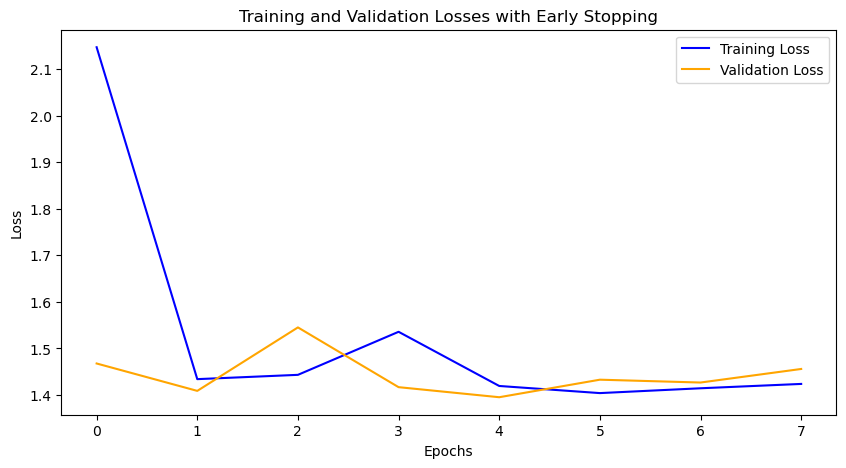

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses with Early Stopping')
plt.show()

In [13]:
import torch
from torchvision import transforms
from PIL import Image
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Load the pre-trained Vision Transformer model
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Load the fine-tuned weights
model.load_state_dict(torch.load("fine_tuned_vit.pth"))
model.eval()


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea

In [20]:
image_path = r"D:\Satsure\Data\train_features\wghy\B02.tif"
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_image = transform(image).unsqueeze(0)  # Add batch dimension


In [21]:
with torch.no_grad():
    outputs = model(input_image)

probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
predicted_class = torch.argmax(probabilities, dim=1).item()


In [22]:
cloud_probability_threshold = 0.5  # Adjust the threshold as needed

if probabilities[0, 1] > cloud_probability_threshold:
    # Mask clouds (set cloud pixels to 0)
    cloud_mask = (probabilities[0, 1] > cloud_probability_threshold).to(torch.uint8)
    masked_image = input_image.squeeze() * (1 - cloud_mask)
else:
    # No clouds detected, use original image
    masked_image = input_image.squeeze()


In [23]:
masked_image

tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

        [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.

In [24]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image


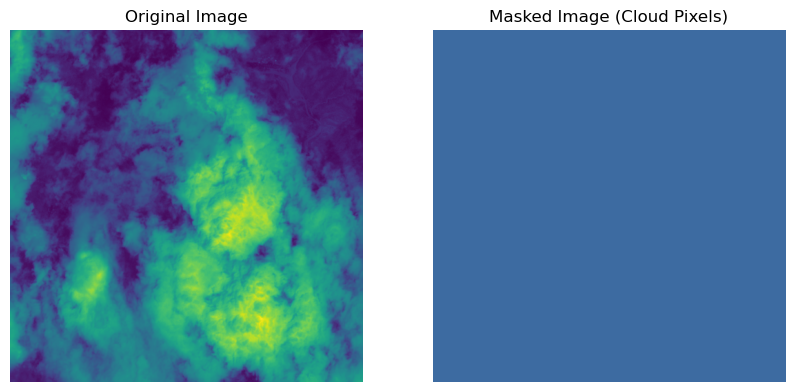

In [25]:
# Convert the masked image tensor back to a PIL image
masked_image_pil = transforms.ToPILImage()(masked_image)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(image_path))
plt.title("Original Image")
plt.axis("off")

# Display the masked image (cloud pixels set to 0)
plt.subplot(1, 2, 2)
plt.imshow(masked_image_pil)
plt.title("Masked Image (Cloud Pixels)")
plt.axis("off")

plt.show()


(-0.5, 223.5, 223.5, -0.5)

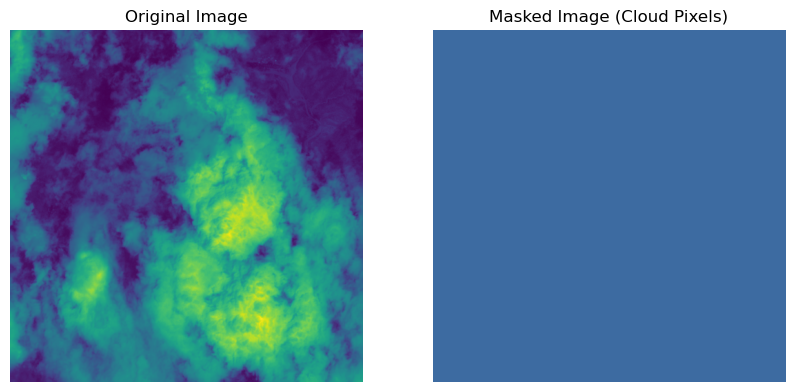

In [31]:
# Convert the masked image tensor back to a PIL image
masked_image_pil = transforms.ToPILImage()(masked_image)
cloud_mask_pil = transforms.ToPILImage()(masked_image)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(image_path))
plt.title("Original Image")
plt.axis("off")

# Display the masked image (cloud pixels set to 0)
plt.subplot(1, 2, 2)
plt.imshow(masked_image_pil)
plt.title("Masked Image (Cloud Pixels)")
plt.axis("off")



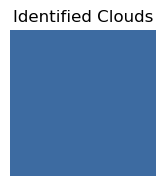

In [32]:
# Display the identified clouds image
plt.subplot(1, 3, 3)
plt.imshow(cloud_mask_pil, cmap='gray')  # Use cmap='gray' for binary images
plt.title("Identified Clouds")
plt.axis("off")

plt.show()

Downloading: 100%|██████████| 160/160 [00:00<00:00, 186kB/s]
Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it fo

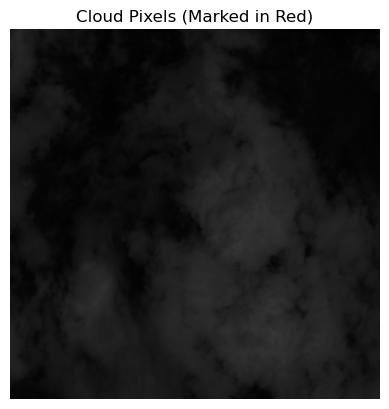

In [34]:
import torch
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Load the ViT model and feature extractor
model_name = "google/vit-base-patch16-224-in21k"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)
model.eval()

# Define transformations for image preprocessing (resize, normalize, etc.)
image_size = (224, 224)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
image_path = r"D:\Satsure\Data\train_features\wghy\B02.tif"
image = Image.open(image_path).convert("RGB")
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass through the model
with torch.no_grad():
    outputs = model(input_image)

# Get the predicted class probabilities
predicted_probs = torch.softmax(outputs.logits, dim=1)[0]

# Get the class index with the highest probability (assuming 1 is the cloud class)
cloud_class_index = 1

# Threshold the prediction probabilities to identify cloud pixels
threshold = 0.5
cloud_mask = predicted_probs[cloud_class_index] > threshold

# Convert the cloud mask tensor to a NumPy array
cloud_mask_np = cloud_mask.cpu().numpy()

# Visualize the cloud pixels on the original image
original_image = cv2.imread(image_path)  # Load the original image
original_image_with_clouds = original_image.copy()
original_image_with_clouds[cloud_mask_np] = [0, 0, 255]  # Mark cloud pixels as red (BGR format)

# Display the original image with cloud pixels marked in red
plt.imshow(cv2.cvtColor(original_image_with_clouds, cv2.COLOR_BGR2RGB))
plt.title("Cloud Pixels (Marked in Red)")
plt.axis("off")
plt.show()


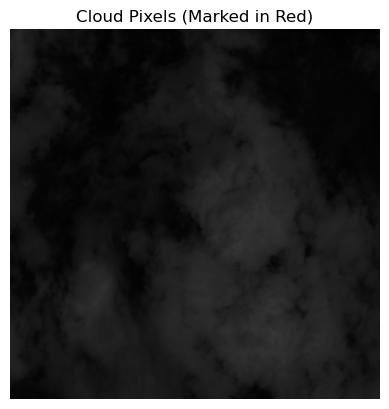

In [35]:
import torch
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Load the ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Load the fine-tuned weights
model.load_state_dict(torch.load("fine_tuned_vit.pth"))
model.eval()

# Define transformations for image preprocessing (resize, normalize, etc.)
image_size = (224, 224)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
image_path = r"D:\Satsure\Data\train_features\wghy\B02.tif"
image = Image.open(image_path).convert("RGB")
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass through the model
with torch.no_grad():
    outputs = model(input_image)

# Get the predicted class probabilities
predicted_probs = torch.softmax(outputs.logits, dim=1)[0]

# Get the class index with the highest probability (assuming 1 is the cloud class)
cloud_class_index = 1

# Threshold the prediction probabilities to identify cloud pixels
threshold = 0.5
cloud_mask = predicted_probs[cloud_class_index] > threshold

# Convert the cloud mask tensor to a NumPy array
cloud_mask_np = cloud_mask.cpu().numpy()

# Visualize the cloud pixels on the original image
original_image = cv2.imread(image_path)  # Load the original image
original_image_with_clouds = original_image.copy()
original_image_with_clouds[cloud_mask_np] = [0, 0, 255]  # Mark cloud pixels as red (BGR format)

# Display the original image with cloud pixels marked in red
plt.imshow(cv2.cvtColor(original_image_with_clouds, cv2.COLOR_BGR2RGB))
plt.title("Cloud Pixels (Marked in Red)")
plt.axis("off")
plt.show()


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the model name or path to a pre-trained ViT model
model_name = "google/vit-base-patch16-224"

# Load the fine-tuned weights
model.load_state_dict(torch.load("fine_tuned_vit.pth"))
model.eval()

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Evaluate the model on the validation dataset
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.logits, 1)  # Get the predicted class indices
        accuracy = torch.sum(predicted == labels).item() / len(labels)  # Calculate accuracy
        print(f"Accuracy: {accuracy:.2f}")  # Print accuracy for each batch

        true_labels.extend(labels.numpy())  # Convert tensor to numpy array
        predicted_labels.extend(predicted.numpy())  # Convert tensor to numpy array

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.25
Accuracy: 0.19
Accuracy: 0.34
Accuracy: 0.25
Accuracy: 0.28
Accuracy: 0.30
Accuracy: 0.27
Precision: 0.07
Recall: 0.27
F1-Score: 0.11


C:\Users\venke\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
